In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_5871594/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5871594.csv")
df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [41]:
# 1. Check the column names
print(df.columns.tolist())

# 2. Remove leading/trailing spaces from column names (if any)
df.columns = df.columns.str.strip()

# 3. Display basic info about the DataFrame
print(df.info())

# 4. Display unique country names (if a 'Country Name' or similar column exists)
if 'Country Name' in df.columns:
    print(df['Country Name'].unique())

# 5. Filter data for a specific country (example: United States)
chosen_country = 'United States'
if 'Country Name' in df.columns:
    country_data = df[df['Country Name'] == chosen_country]
    print(country_data)

# 6. Describe the DataFrame for statistical summary (if numeric columns exist)
print(df.describe(include='all'))


['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName', 'Unnamed: 5']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  127 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB
None
       Country Code                 Region  IncomeGroup  \
count           265                    217          216   
unique          265                      7            4   
top             ABW  Europe & Central Asia  High income   
freq              1                     58           82   
mean            NaN                    NaN          NaN   
std             NaN                    NaN          NaN

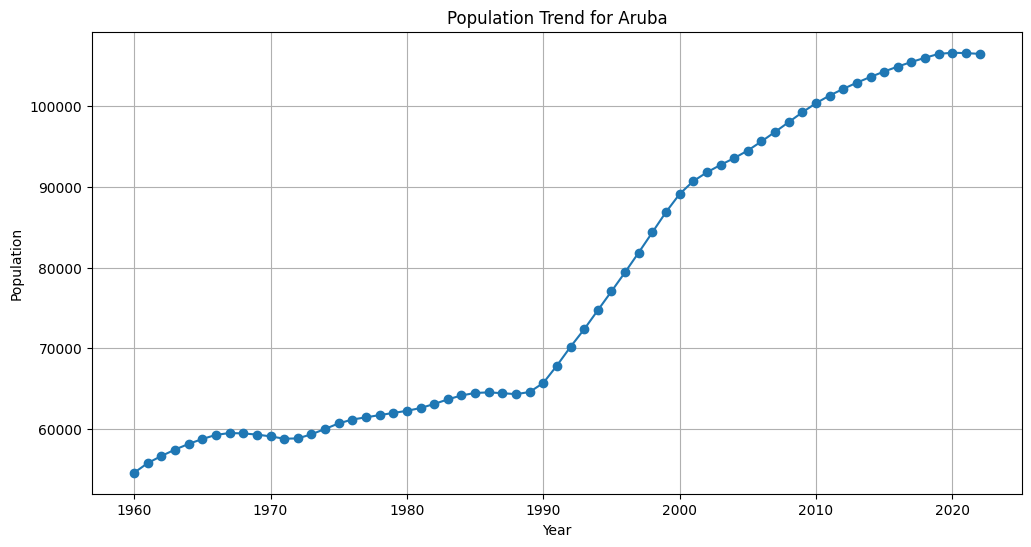

In [44]:
chosen_code = 'ABW'  # Aruba का country code
country_data = df[df['Country Code'] == chosen_code]


year_columns = [col for col in country_data.columns if col.isdigit()]
years = pd.Index(year_columns).astype(int)
population_values = country_data[year_columns].iloc[0].values
population_values = pd.to_numeric(population_values, errors='coerce')

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(years, population_values, marker='o')
plt.title('Population Trend for Aruba')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()


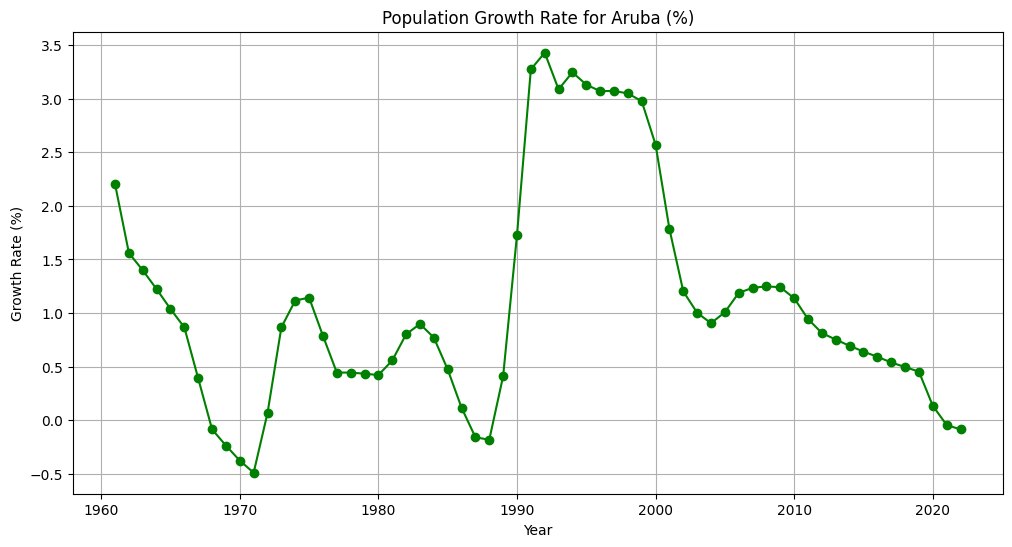

In [47]:
# Population growth rate (percentage change year-over-year)
growth_rate = pd.Series(population_values).pct_change() * 100

plt.figure(figsize=(12,6))
plt.plot(years[1:], growth_rate[1:], marker='o', color='green')
plt.title('Population Growth Rate for Aruba (%)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


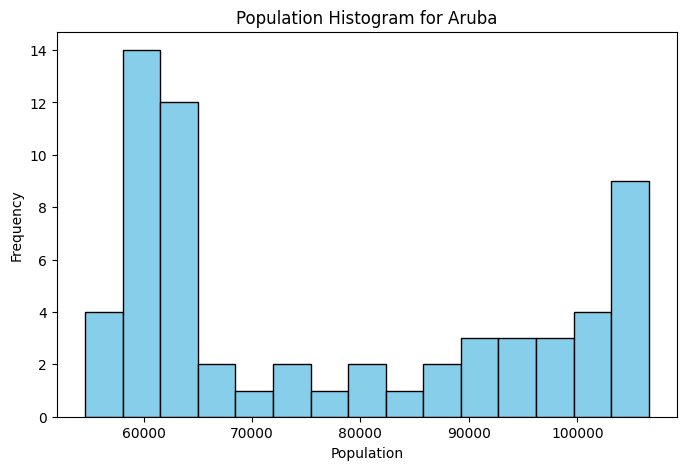

In [48]:
plt.figure(figsize=(8,5))
plt.hist(pd.Series(population_values).dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Population Histogram for Aruba')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


In [49]:
print(f"Aruba latest population (2023): {int(population_values[-2])}")
print(f"Aruba population growth rate (2023): {growth_rate.iloc[-1]:.2f}%")


Aruba latest population (2023): 106537
Aruba population growth rate (2023): -0.09%


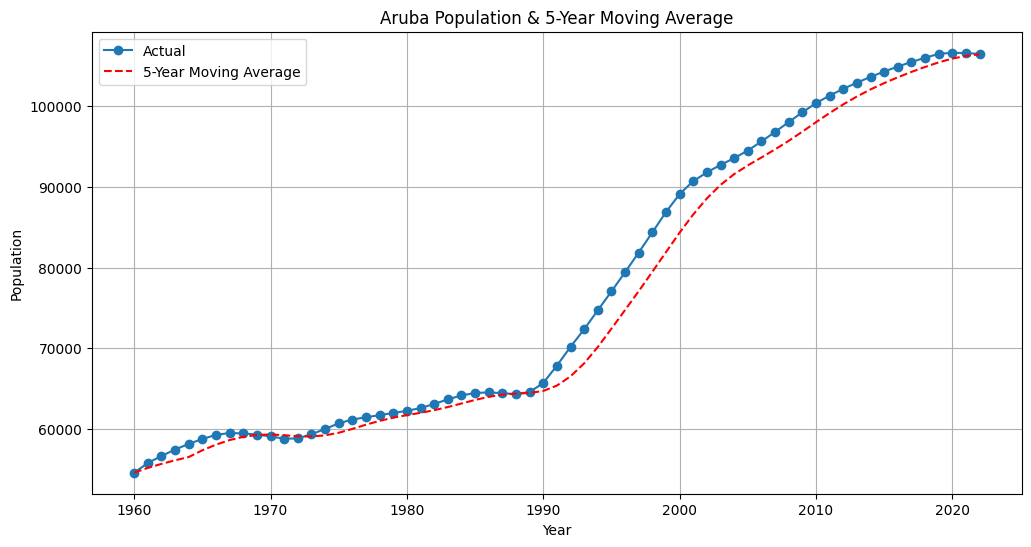

In [50]:
population_ma = pd.Series(population_values).rolling(window=5, min_periods=1).mean()

plt.figure(figsize=(12,6))
plt.plot(years, population_values, marker='o', label='Actual')
plt.plot(years, population_ma, color='red', linestyle='--', label='5-Year Moving Average')
plt.title('Aruba Population & 5-Year Moving Average')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()
